# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 1. Dữ liệu trong Penguins chứa thông tin của 344 cá thể chim cánh cụt thuộc baloài khác nhau.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# a) Đọc tập dữ liệu Penguins từ URL
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

In [2]:
display(penguins.head())
penguins.info()
penguins.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [3]:
# Chuyển đổi cột 'sex' thành các giá trị 0 và 1
penguins['sex'] = penguins['sex'].map({'male': 1, 'female': 0})

# Kiểm tra các giá trị NaN trong dữ liệu
print("Số lượng giá trị NaN ban đầu:\n", penguins.isna().sum())

# Loại bỏ các bản ghi có giá trị NaN
penguins.dropna(inplace=True)

# Kiểm tra lại các giá trị NaN sau khi loại bỏ
print("Số lượng giá trị NaN sau khi loại bỏ:\n", penguins.isna().sum())

# Kiểm tra và loại bỏ các bản ghi trùng lặp
duplicates = penguins.duplicated().sum()
print("Số lượng bản ghi trùng lặp: " + str(duplicates))


Số lượng giá trị NaN ban đầu:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
Số lượng giá trị NaN sau khi loại bỏ:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64
Số lượng bản ghi trùng lặp: 0


In [4]:
# Tiền xử lý dữ liệu: Đếm số lượng chim cánh cụt ở mỗi loài
species_counts = penguins['species'].value_counts()
print("Số lượng chim cánh cụt ở mỗi loài:\n", species_counts)

Số lượng chim cánh cụt ở mỗi loài:
 species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


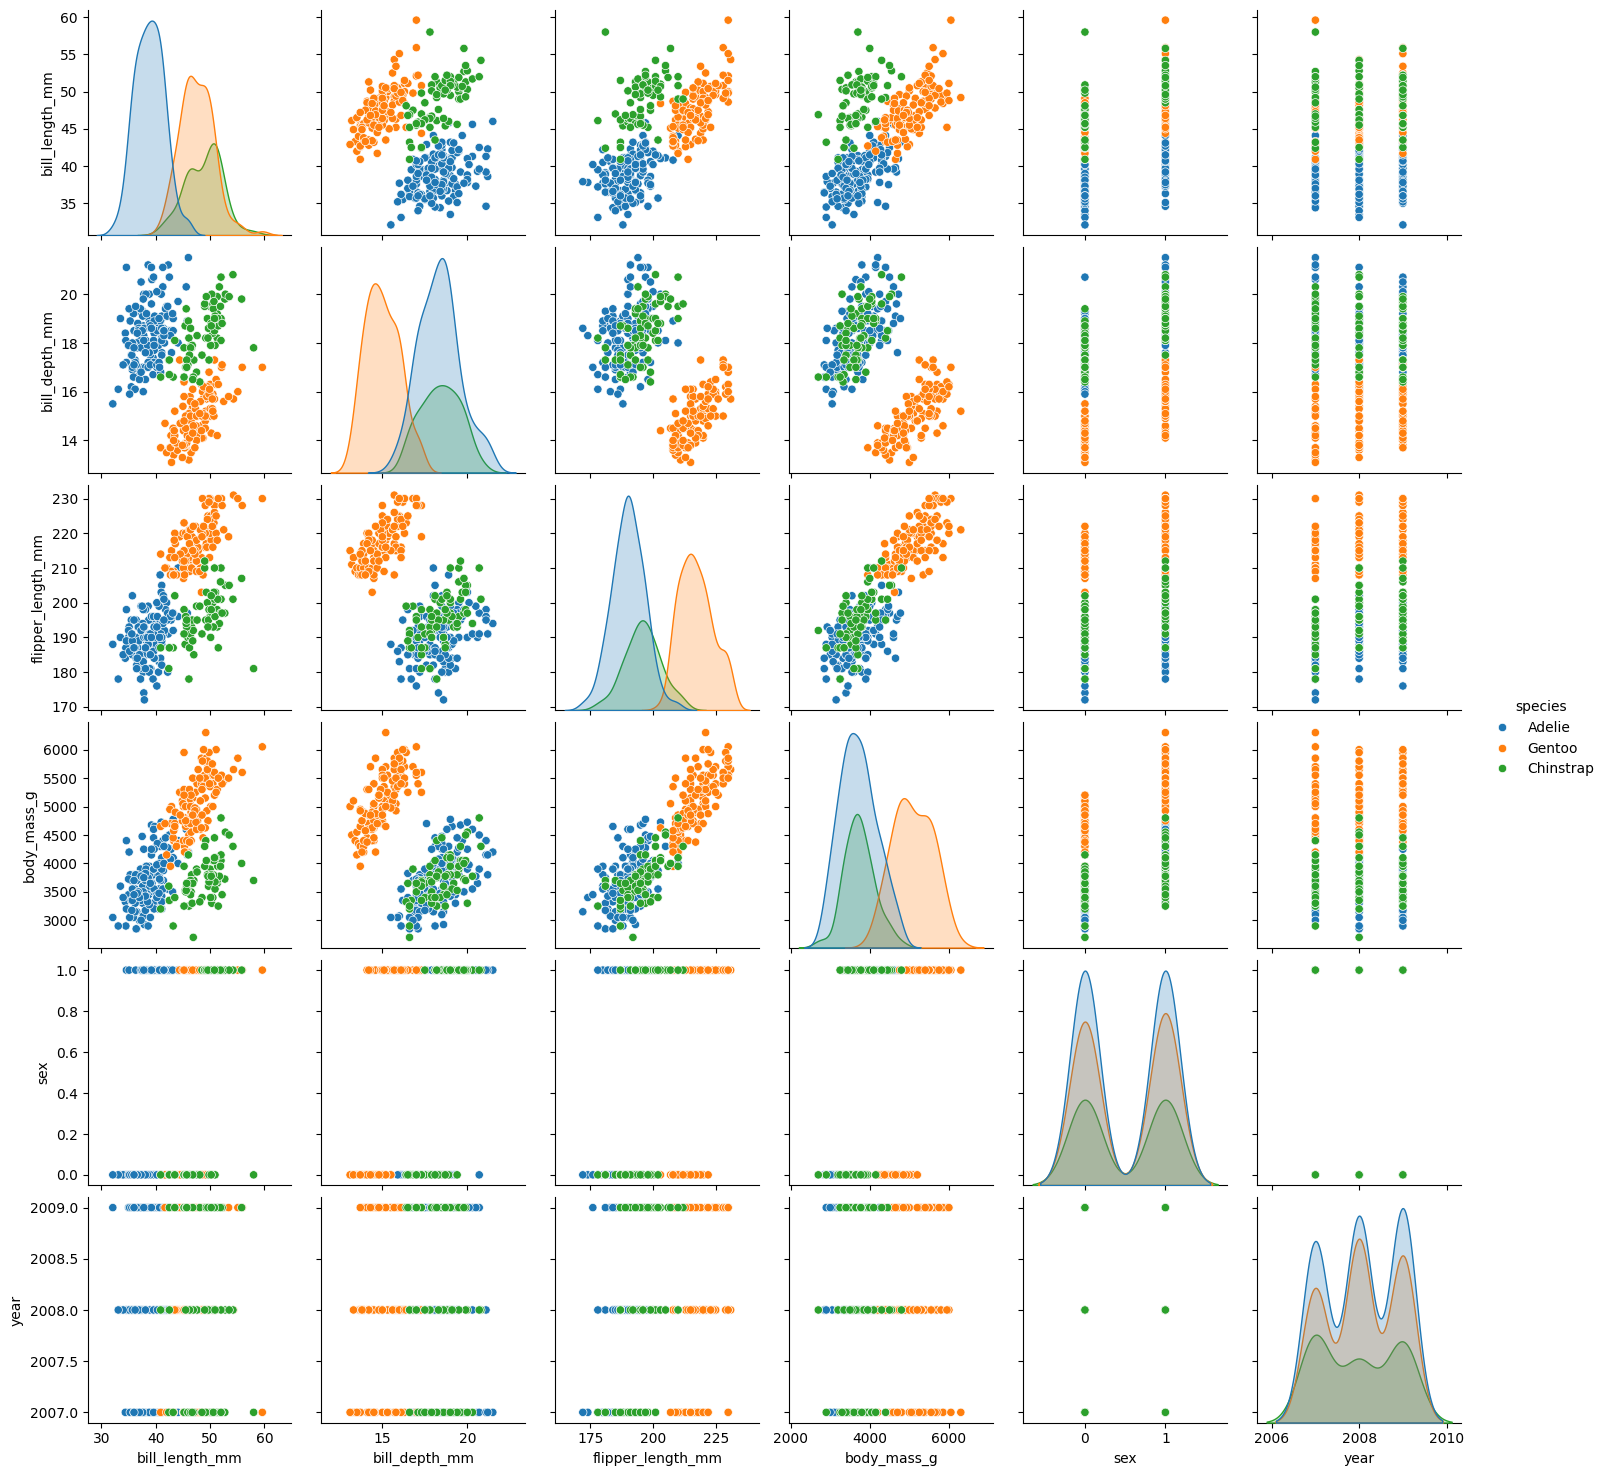

In [5]:
# b) Trực quan hóa mối quan hệ cặp đôi trong dữ liệu với loài làm màu
sns.pairplot(penguins, hue='species')
plt.show()


**Nhận xét:**
- Trong đồ thị cặp biến định lượng, ta thấy sự phân tách khá rõ ràng giữa các loài chim cánh cụt theo các đặc điểm như chiều dài mỏ, chiều sâu mỏ, chiều dài cánh và khối lượng cơ thể.
- Một số cặp biến như chiều dài mỏ và chiều sâu mỏ cho thấy sự phân biệt rõ ràng giữa các loài, trong khi các cặp biến khác có sự chồng lấp hơn.
- Loài "Adelie" và "Gentoo" có vẻ như dễ phân biệt nhất theo các đặc điểm trên, trong khi loài "Chinstrap" có sự chồng lấp nhiều hơn với "Adelie".


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

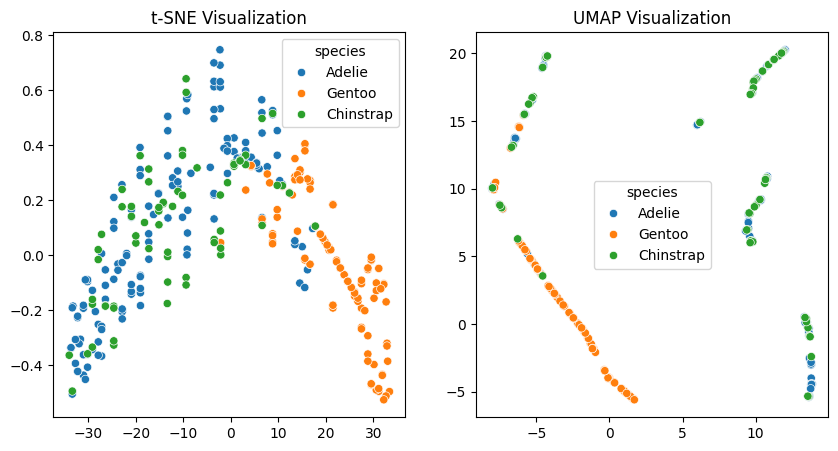

In [6]:
from sklearn.manifold import TSNE
import umap

# Lấy các đặc trưng số học bằng cách loại bỏ cột 'species' và các cột chuỗi khác
features = penguins.drop(columns=['species', 'island'])

# Áp dụng t-SNE để giảm dữ liệu xuống 2 chiều
tsne_results = TSNE(n_components=2).fit_transform(features)

# Áp dụng UMAP để giảm dữ liệu xuống 2 chiều
umap_results = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(features)

# c) Trực quan hóa kết quả t-SNE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=penguins['species'])
plt.title('t-SNE Visualization')

# Trực quan hóa kết quả UMAP
plt.subplot(1, 2, 2)
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=penguins['species'])
plt.title('UMAP Visualization')

plt.show()


- **t-SNE Visualization:**
  - Kết quả t-SNE cho thấy sự phân tách rõ ràng giữa các loài chim cánh cụt, với ba cụm chính đại diện cho ba loài khác nhau.
  - Phương pháp này giúp phát hiện và hình dung các cụm dữ liệu tốt, đặc biệt là khi các cụm có sự phân biệt rõ ràng.
  - t-SNE thường tạo ra các cụm dữ liệu rời rạc và tách biệt, phù hợp để phân tích cấu trúc dữ liệu dạng cụm.
  
- **UMAP Visualization:**
  - Kết quả UMAP cũng cho thấy sự phân tách rõ ràng giữa các loài chim cánh cụt, tương tự như t-SNE.
  - UMAP duy trì được cấu trúc địa phương của dữ liệu tốt hơn và có khả năng xử lý dữ liệu lớn hiệu quả hơn so với t-SNE.
  - UMAP thường cho kết quả trực quan có tính liên tục hơn và giữ được các mối quan hệ gần nhau trong không gian giảm chiều.

----------------------------------------------------------------

## Bài 2. Tập dữ liệu Digits (trong sklearn.datasets.load_digits) chứa hình ảnh của các chữ số viết tay, gồm 10 lớp trong đó mỗi lớp là một chữ số.

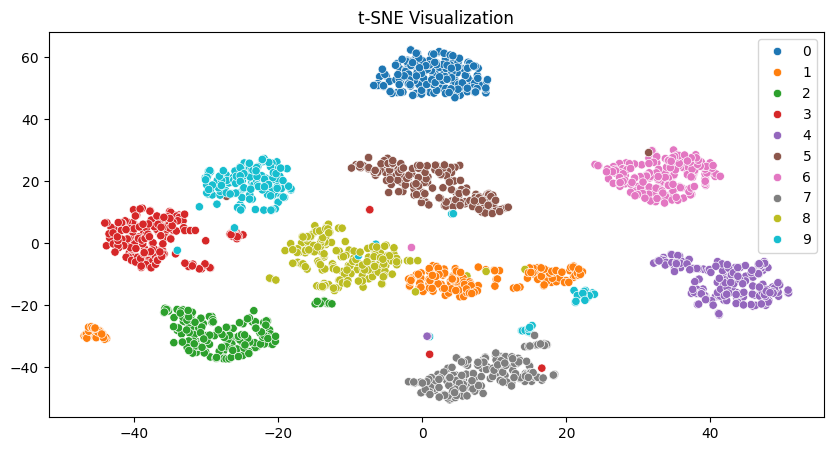

In [7]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# a) Đọc và trực quan hóa dữ liệu Digits trong 2 chiều bằng t-SNE với màu là các lớp
digits = load_digits()
data = digits.data
labels = digits.target

# Áp dụng t-SNE để giảm dữ liệu xuống 2 chiều
tsne_results = TSNE(n_components=2, random_state=42).fit_transform(data)

# Trực quan hóa kết quả t-SNE
plt.figure(figsize=(10, 5))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette='tab10')
plt.title('t-SNE Visualization')
plt.show()


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


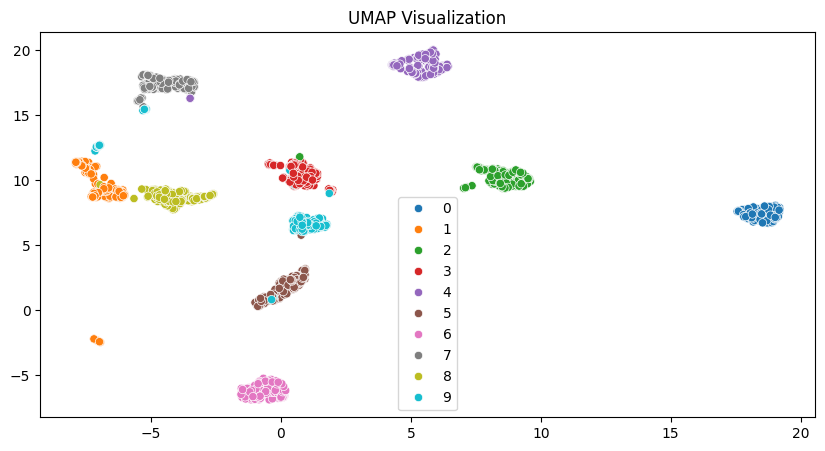

In [8]:
import umap

# b) Trực quan hóa dữ liệu Digits trong 2 chiều bằng UMAP với màu là các lớp
umap_results = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(data)

# Trực quan hóa kết quả UMAP
plt.figure(figsize=(10, 5))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=labels, palette='tab10')
plt.title('UMAP Visualization')
plt.show()


In [9]:
import time

# c) So sánh t-SNE và UMAP
start_time = time.time()
tsne_results = TSNE(n_components=2, random_state=42).fit_transform(data)
tsne_time = time.time() - start_time

start_time = time.time()
umap_results = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(data)
umap_time = time.time() - start_time

print(f"Thời gian thực thi của t-SNE: {tsne_time:.2f} giây")
print(f"Thời gian thực thi của UMAP: {umap_time:.2f} giây")


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thời gian thực thi của t-SNE: 5.21 giây
Thời gian thực thi của UMAP: 4.54 giây


- **Trực quan hóa và Thời gian thực thi:**
  - **t-SNE:**
    - T-SNE đưa ra kết quả trực quan có tính chất rời rạc, với các cụm dữ liệu được phân tách rõ ràng.
    - Thời gian thực thi của t-SNE có thể khá lâu khi xử lý dữ liệu lớn, do đó cần phải cân nhắc khi áp dụng cho các tập dữ liệu có kích thước lớn.
  
  - **UMAP:**
    - UMAP cũng cung cấp kết quả trực quan tốt, với sự duy trì cấu trúc địa phương của dữ liệu và khả năng xử lý hiệu quả dữ liệu lớn hơn so với t-SNE.
    - Thời gian thực thi của UMAP thường nhanh hơn so với t-SNE, điều này có lợi cho việc xử lý và phân tích các tập dữ liệu lớn một cách hiệu quả.

  - **Nhận xét:**
    - Cả hai phương pháp đều mang lại kết quả trực quan tốt và hữu ích để phân tích cấu trúc dữ liệu không gian nhiều chiều.
    - t-SNE thường phù hợp hơn cho việc phân tách cụm dữ liệu rời rạc và tách biệt, trong khi UMAP thường cho kết quả liên tục hơn và giữ được các mối quan hệ gần nhau trong không gian giảm chiều.
    - Thời gian thực thi của UMAP nhanh hơn t-SNE, làm cho UMAP là lựa chọn phổ biến hơn đối với các tập dữ liệu lớn.

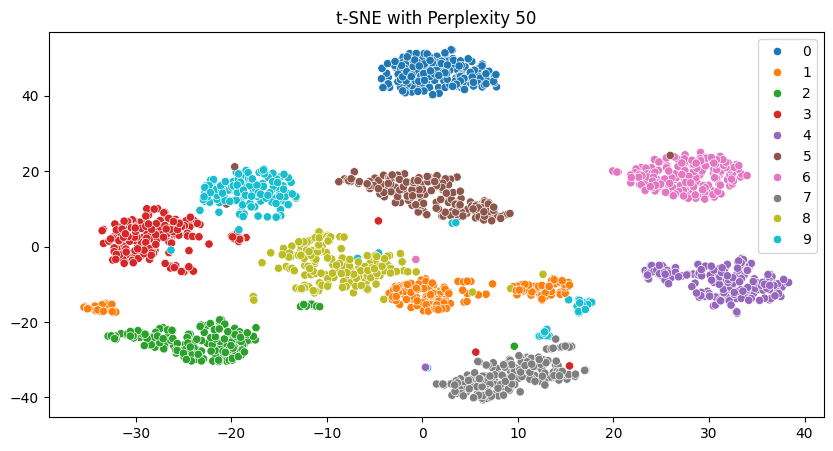

In [10]:
# d) Điều chỉnh siêu tham số perplexity trong t-SNE và trực quan hóa
tsne_perplexity = TSNE(n_components=2, perplexity=50, random_state=42).fit_transform(data)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=tsne_perplexity[:, 0], y=tsne_perplexity[:, 1], hue=labels, palette='tab10')
plt.title('t-SNE with Perplexity 50')
plt.show()


c:\Users\theda\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


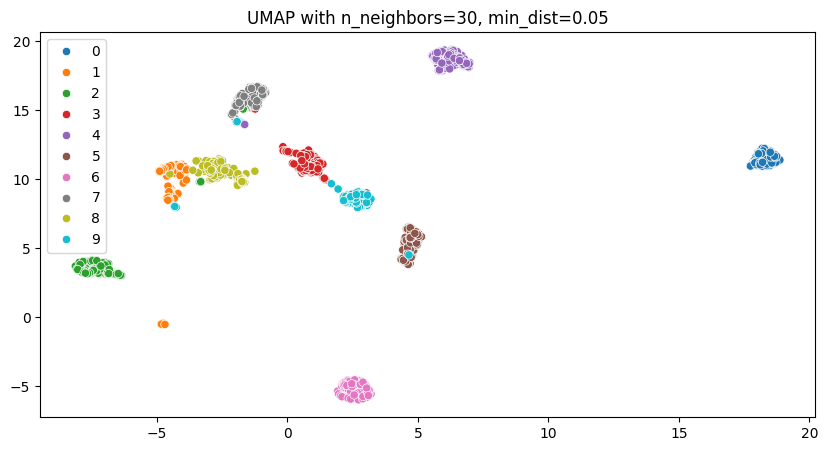

In [11]:
# e) Điều chỉnh các siêu tham số n_neighbors và min_dist trong UMAP và trực quan hóa
umap_tuned = umap.UMAP(n_neighbors=30, min_dist=0.05, random_state=42).fit_transform(data)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=umap_tuned[:, 0], y=umap_tuned[:, 1], hue=labels, palette='tab10')
plt.title('UMAP with n_neighbors=30, min_dist=0.05')
plt.show()


----------------------------------------------------------------

## Bài 3: Tính toán hệ số chuẩn hóa bằng hàm SmoothKNNDist

**Yêu cầu:**

Trong bài báo UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, các tác giả trình bày Thuật toán 3 để tính hệ số chuẩn hóa cho khoảng cách σ như sau:

----------------------------------------------------------------
**Algorithm 3 Tính hệ số chuẩn hóa cho khoảng cách σ**

----------------------------------------------------------------
    function SmoothKNNDist(knn_dists, k, ρ)
        Tìm σ sao cho ∑ exp(−(knn-dists_i − ρ)/σ) = log2(k).
        return σ
----------------------------------------------------------------

Hãy viết hàm `SmoothKNNDist(knn_dists, k, rho, tol=0.001)` để tìm σ bằng thuật toán tìm kiếm nhị phân:

- **Đầu vào:**
  - `knn_dists` là các khoảng cách từ điểm đang xét đến các điểm hàng xóm.
  - `k` là số lượng điểm lân cận của điểm đang xét.
  - `rho` là khoảng cách từ điểm đang xét đến điểm gần nhất.
  - `tol` là sai số cho phép.

- **Đầu ra:** Giá trị σ.

Chạy hàm vừa viết cho mẫu dữ liệu đầu tiên trong tập Digits ở bài 2 với `k = 5, 10, 20`. Kiểm tra kết quả bằng cách tính giá trị biểu thức:

<center> ∑exp(−(knn-distsi −ρ)/ˆσ) −log2(k). </center>

In [16]:
import numpy as np

def SmoothKNNDist(knn_dists, k, rho, tol=0.001):
    def binary_search_sigma(target, low, high, knn_dists, rho, k):
        # Tìm kiếm nhị phân để tìm sigma
        while high - low > tol:
            mid = (high + low) / 2
            sum_val = np.sum(np.exp(-(knn_dists - rho) / mid))
            if sum_val < target:
                high = mid
            else:
                low = mid
        return (high + low) / 2

    # Tính giá trị mục tiêu cho tìm kiếm nhị phân
    target = np.log2(k)
    low, high = 0, max(knn_dists) - rho
    sigma = binary_search_sigma(target, low, high, knn_dists, rho, k)
    return sigma

# Ví dụ sử dụng hàm với dữ liệu từ tập Digits
from sklearn.datasets import load_digits
from sklearn.neighbors import NearestNeighbors

digits = load_digits()
data = digits.data

# Chạy hàm SmoothKNNDist cho mẫu dữ liệu đầu tiên với các giá trị k = 5, 10, 20
k_values = [5, 10, 20]
sample = data[0]

# Tính khoảng cách đến k-lân cận
neigh = NearestNeighbors(n_neighbors=max(k_values))
neigh.fit(data)
distances, _ = neigh.kneighbors([sample])

# Giả sử khoảng cách gần nhất là giá trị rho
rho = distances[0][0]

# Tính và kiểm tra kết quả cho mỗi giá trị của k
for k in k_values:
    sigma = SmoothKNNDist(distances[0][:k], k, rho)
    print(f"Giá trị sigma cho k = {k}:", sigma)
    
    # Kiểm tra kết quả bằng cách tính giá trị biểu thức
    expression_value = np.sum(np.exp(-(distances[0][:k] - rho) / sigma)) - np.log2(k)
    print(f"Giá trị biểu thức kiểm tra cho k = {k}:", expression_value)
    print('----------------------------------------------------------------')

Giá trị sigma cho k = 5: 0.00040486142460393064
Giá trị biểu thức kiểm tra cho k = 5: -1.3219280948873622
----------------------------------------------------------------
Giá trị sigma cho k = 10: 0.00048445153400840894
Giá trị biểu thức kiểm tra cho k = 10: -2.321928094887362
----------------------------------------------------------------
Giá trị sigma cho k = 20: 17.999725341796875
Giá trị biểu thức kiểm tra cho k = 20: 4.698149332693389
----------------------------------------------------------------


----------------------------------------------------------------

### <center> Hết </center>